In [15]:
import numpy as np
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [16]:
def Euclidean_distances(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class kmeans:
    def __init__(self, n_clusters=8, max_iter = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        
#  Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,

        self.centroids = [random.choice(X)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([Euclidean_distances(X, centroid) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X)), size=1, p=dists)[0]
            self.centroids += [X[new_centroid_idx]]
    
        prev_centroids = None
        iteration = 0
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X:
                dists = Euclidean_distances(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
                
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]

            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            distance = Euclidean_distances(x, self.centroids)
            centroid_idx = np.argmin(distance)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idx



In [17]:
centers = 5

X_train, true_labels = sklearn.datasets.make_blobs(n_samples=100, centers=centers, random_state = 42)

X_train = StandardScaler().fit_transform(X_train)

model = kmeans(n_clusters = centers)

model.fit(X_train)

class_centers, classification = model.evaluate(X_train)



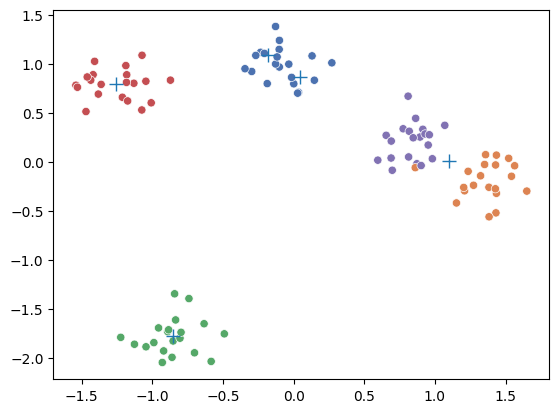

In [18]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in model.centroids],
         [y for _, y in model.centroids],
         '+',
         markersize=10,
         )
plt.show()

In [19]:
model.centroids

[array([-0.18417773,  1.08641641]),
 array([-0.85560376, -1.78334025]),
 array([-1.25790785,  0.78626163]),
 array([1.09798984, 0.00581371]),
 array([0.04184373, 0.86204926])]

#### Summary
1. The train set has data of shape (n_samples * n_features)

2. we perform the iterative process of optimizing the centroid locations.
   The optimization process is to readjust the centroid locations to be the mean of the points belonging to it. This process is to      repeat until the centroids stop moving, or the maximum number of iterations is passed. 
 
3. np.min returns the actual min value present in the array
   np.argmin returns the index of the min value in the array.
   
4. K-means++ improves initialization by choosing centroids that are spread out across the dataset.

